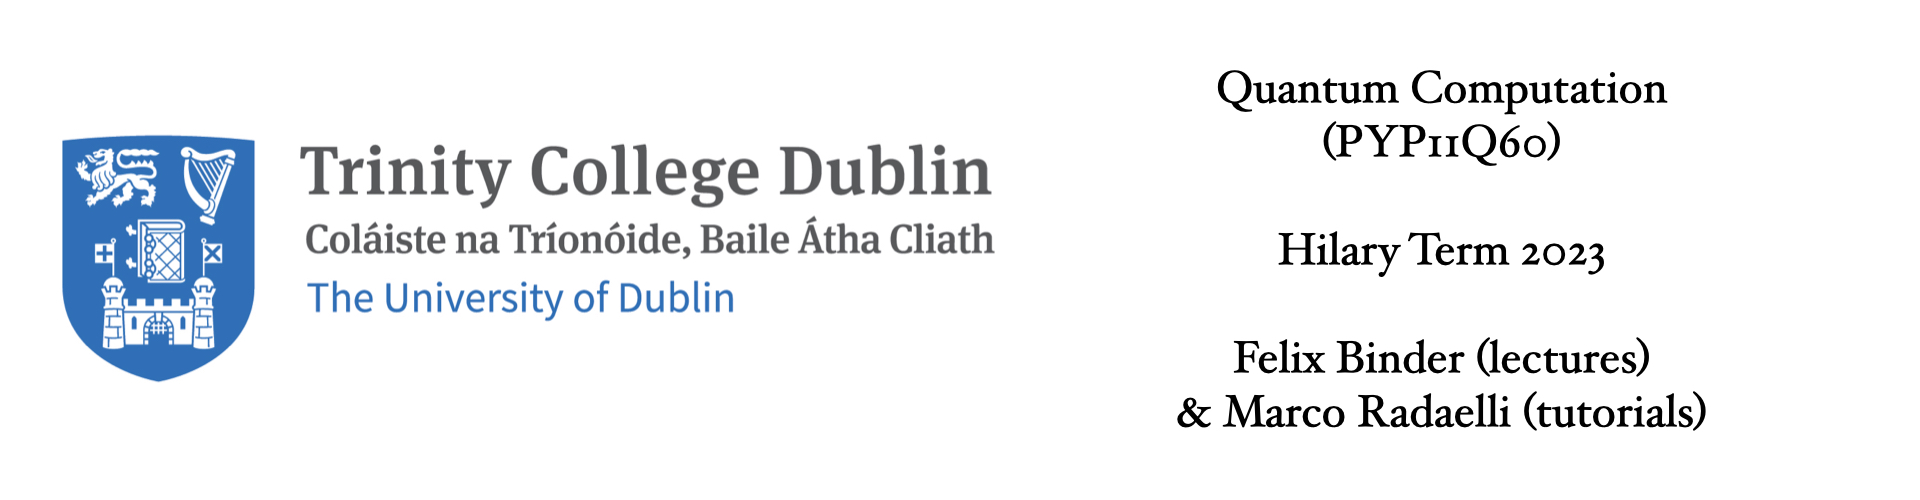

# Problem set 3

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 3.0 - Dependencies
Please add all relevant dependencies for the problems to the following cell and avoid the <code>import</code> command elsewhere.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram

# 3.1 - Quantum Fourier Transform (3 pts.)

Consider the unitary operator $\mathcal{F}$ for the Quantum Fourier Transform (QFT)
$$\mathcal{F} \ket{j} = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi i j k /N}\ket{k}.$$
<ol>
    <li>Compute explicitly the Fourier transform on the $n$ qubits state $\ket{0\ldots 0}$</li>
    <li>We already know a quantum circuit for $\mathcal{F}$ from the lectures. In Qiskit, create that circuit for 5 qubits, and transform it into a gate using the appropriate functions.</li>
        <li>Give a quantum circuit for the inverse Quantum Fourier Transform (i.e., for the operator $\mathcal{F}^\dagger$) on 5 qubits. Create that circuit in Qiskit and also transform it into a gate.</li>
    <li>Again using Qiskit, create the circuits $\mathcal{F}\mathcal{F}^\dagger$ and $\mathcal{F}^\dagger\mathcal{F}$. Obtain the matrix representation of the two circuits, and show that it is equal to the identity in both cases.</li>
</ol>

### Solution
### 1.1
Given n qubits initialised to ground state, applying Quantum Fourier Transform to them. I did this step-by-step as seen in the lecture.



Step 1:

First applying Hadamard gate to qubit 1
\begin{equation*}
H_{1}\ket{00...0} =\frac{1}{\sqrt{2}}\left(\ket{0} +\ket{1}\right) \otimes \ket{0...0}
\end{equation*}
where 1st part is qubit 1 in superposition and rest of the qubits are qubit 2 to n.



Step 2:

Apply conditional phase shift to qubit 1 controlled by qubit 2. The state after doing this is
\begin{equation*}
\frac{1}{\sqrt{2}}\left(\ket{0} +\ket{1}\right) \otimes \ket{0...0}
\end{equation*}
There is no change in the state as the control ,i.e. qubit 2 is 0.



Step 3:

Keep applying conditional phase shift to qubit 1 controlled by each qubit till the nth qubit. The state achieved after doing this is
\begin{equation*}
\frac{1}{\sqrt{2}}\left(\ket{0} +\ket{1}\right) \otimes \ket{0...0}
\end{equation*}
There is no change in the state as the rest of the qubits till nth qubit are 0, which means that the control is 0 and the state of qubit 1 is not changed.



Step 4:

Similarly, apply the above sequence to rest of the qubits. The state after applying this is
\begin{gather*}
\frac{1}{\sqrt{2}}\left(\ket{0} +\ket{1}\right) \otimes \frac{1}{\sqrt{2}}\left(\ket{0} +\ket{1}\right) \otimes \frac{1}{\sqrt{2}}\left(\ket{0} +\ket{1}\right) \otimes ....\otimes \frac{1}{\sqrt{2}}\left(\ket{0} +\ket{1}\right)\\
=\frac{1}{\sqrt{N}}\left(\left(\ket{0} +\ket{1}\right) \otimes \left(\ket{0} +\ket{1}\right) \otimes \left(\ket{0} +\ket{1}\right) \otimes ....\otimes \left(\ket{0} +\ket{1}\right)\right) \ \ ...\left\{As\ 2^{n} =N\right\}
\end{gather*}
So, applying Fourier transform to n qubits initialised to the ground state $\displaystyle \ket{00...0}$, we get the following expression
\begin{equation*}
=\frac{1}{\sqrt{N}}\left(\left(\ket{0} +\ket{1}\right) \otimes \left(\ket{0} +\ket{1}\right) \otimes \left(\ket{0} +\ket{1}\right) \otimes ....\otimes \left(\ket{0} +\ket{1}\right)\right)
\end{equation*}

### 1.2
The quantum circuit for QFT with 5 qubits is 



Implementation using qiskit-
(Note:As qiskit orders qubits in reverse order, the numbering of qubits for implementation is reversed)

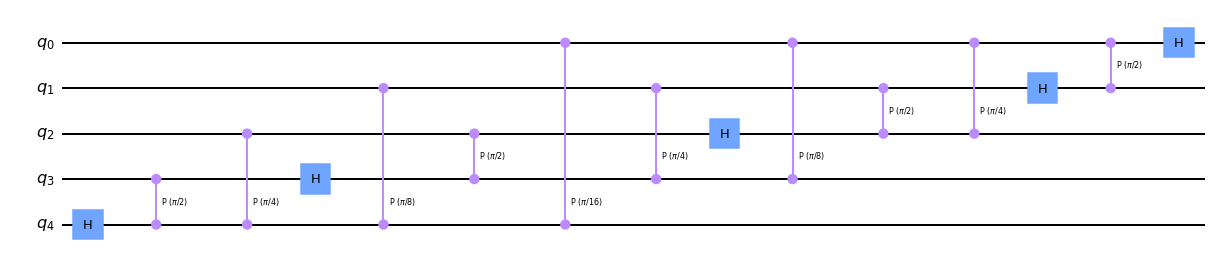

In [2]:
qft=QuantumCircuit(5, name='F')

#Step 1- Apply Hadamard gate to first qubit (as qiskit's qubit order is reversed, I have applied gates likewise)
qft.h(4)

#Step 2- Apply controlled phase shift gate from rest of the qubits to the first qubit

qft.cp(np.pi/2,3,4)
qft.cp(np.pi/4,2,4)
qft.cp(np.pi/8,1,4)
qft.cp(np.pi/16,0,4)
qft.h(3)
qft.cp(np.pi/2,2,3)
qft.cp(np.pi/4,1,3)
qft.cp(np.pi/8,0,3)
qft.h(2)
qft.cp(np.pi/2,1,2)
qft.cp(np.pi/4,0,2)
qft.h(1)
qft.cp(np.pi/2,0,1)
qft.h(0)

qft.draw('mpl')

In [3]:
#Transforming the above circuit to gate
F=qft.to_gate()

### 1.3
For creating the inverse of Quantum Fourier transform circuit, I have used qiskit's function to inverse a circuit

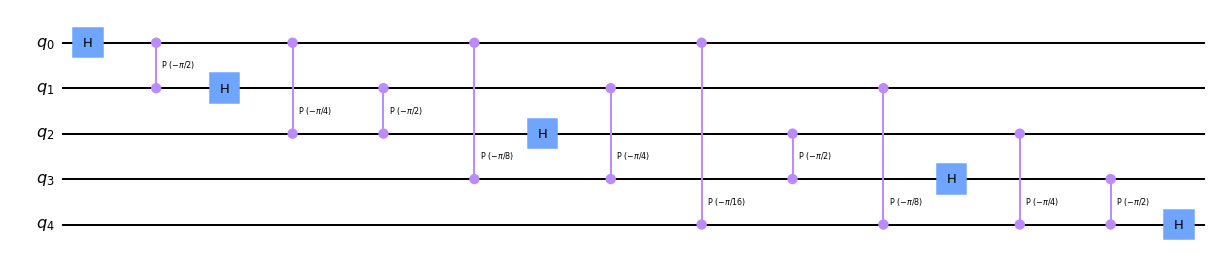

In [4]:
qft_inverse=qft.inverse()
qft_inverse.draw('mpl')

In [5]:
F_dagger=qft_inverse.to_gate()

### 1.4

Creating circuit for F_dagger F

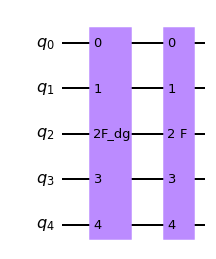

In [6]:
F_dagger_F=QuantumCircuit(5)
F_dagger_F.append(F_dagger,[0,1,2,3,4])
F_dagger_F.append(F,[0,1,2,3,4])
F_dagger_F.draw('mpl')

Create circuit for F F_dagger

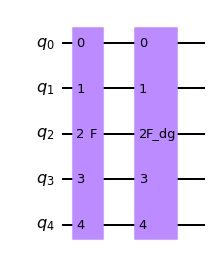

In [7]:
F_F_dagger=QuantumCircuit(5)
F_F_dagger.append(F,[0,1,2,3,4])
F_F_dagger.append(F_dagger,[0,1,2,3,4])
F_F_dagger.draw('mpl')

Calculating unitary matrix of the above circuit

In [8]:
backend = Aer.get_backend('unitary_simulator')

job1 = execute(F_dagger_F, backend)
result1 = job1.result().get_unitary(F_dagger_F, decimals=3)
print("Unitary of F-dagger F circuit-\n",result1)

job2 = execute(F_F_dagger, backend)
result2 = job2.result().get_unitary(F_F_dagger, decimals=3)
print("Unitary of F F-dagger circuit-\n",result2)

Unitary of F-dagger F circuit-
 Operator([[ 1.-0.j, -0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j,  1.-0.j, -0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j,  0.+0.j,  1.-0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          ...,
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  1.-0.j, -0.+0.j, -0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  1.-0.j, -0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -0.+0.j,  0.+0.j,  1.-0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))
Unitary of F F-dagger circuit-
 Operator([[ 1.-0.j,  0.+0.j, -0.-0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.-0.j,  0.+0.j, ..., -0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.-0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          ...,
          [ 0.+0.j, -0.-0.j,  0.+0.j, ...,  1.-0.j,  0.+0.j, -0.+0.j],
          [-0.-0.j,  0.+0.j, -0.-0.j, ...,  0.+0.j,  1.-0.j,  0.+0.j],
          [ 0.+0.j, -0.-0.j,  0.+0.j, ...,  0.+0.j,  0.+0.

Checking whether the unitary of the above circuit is identity.

In [9]:
print("Is Unitary matrix of F-dagger F circuit equal to Identity=",np.allclose(result1,np.eye(2**5)))
print("Is Unitary matrix of F F-dagger circuit equal to Identity=",np.allclose(result2,np.eye(2**5)))
print("Is Unitary matrix of F-dagger F circuit equal to Unitary matrix of F F-dagger circuit=",np.allclose(result1,result2))

Is Unitary matrix of F-dagger F circuit equal to Identity= True
Is Unitary matrix of F F-dagger circuit equal to Identity= True
Is Unitary matrix of F-dagger F circuit equal to Unitary matrix of F F-dagger circuit= True


# 3.2 - Quantum Phase Estimation (8 pts. total)

## 3.2.a Qiskit code /1 (4 pts.)

<ol>
    <li>In Qiskit, create the quantum circuit for quantum phase estimation of a <code>T-gate</code>. How many qubits do you need to consider to obtain an exact value for the phase for the eigenstate $\ket{0}$? How many for the eigenstate $\ket{1}$?</li>
    <li>Create a complete Python function <code>phase_estimation(oracle, eigenstate, number_qubits)</code> which performs the phase estimation for a generic oracle <code>oracle</code> on the eigenstate <code>eigenstate</code>, employing <code>number_qubits</code> qubits. The function should perform a quantum simulation, and return the estimated value of the phase (i.e., to bit-precision of <code>number_qubits</code>). Apply the function to the <code>T-gate</code> of the previous exercise, and verify that it works as expected.</li>
    <li>Now, run the function with a different oracle, given by $R_z\left(\frac{1}{3}\right)$. What happens?</li>
    <li>In a graph, plot the highest-probability result obtained for the phase estimation of $R_z\left(\frac{1}{3}\right)$, as a function of the number of employed qubits <code>number_qubits</code>.</li>
</ol>

### Solution
### 2.1

First building circuit for Quantum Fourier Transform with 3 qubits and creating it's inverse.

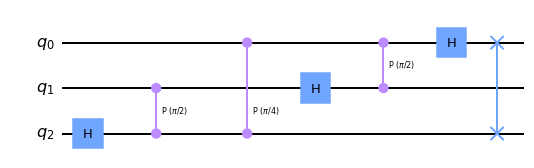

In [10]:
qft3=QuantumCircuit(3)
qft3.h(2)
qft3.cp(np.pi/2, 1, 2)
qft3.cp(np.pi/4, 0, 2)
qft3.h(1)
qft3.cp(np.pi/2, 0, 1)
qft3.h(0)
qft3.swap(0,2)
qft3.draw('mpl')

In [11]:
F3=qft3.inverse().to_gate()

To create the circuit for QPE, I have used 3 counting qubits and 1 qubit to save the eigenstate.

In [12]:
def qpe_T_gate(eigenvalue=0):
    qpe=QuantumCircuit(4,3)
    if eigenvalue==1:
        qpe.x(3)
    
    #Applying Hadamard to counting qubits
    for qubit in range(3):
        qpe.h(qubit)
        
    #Apply controlled unitary operations
    repetitions = 1
    for counting_qubit in range(3):
        for i in range(repetitions):
            qpe.cp(np.pi/4, counting_qubit, 3)
        repetitions *= 2
        
    #Apply inverse-QFT to the circuit
    qpe.append(F3,[0,1,2])
    
    #Measure the counting qubits
    for n in range(3):
        qpe.measure(n,n)
        
    return qpe

For eigenstate |0>, we get the exact value with 4 qubits, 3 counting qubits and 1 qubit to store eigenstate of the operator T.

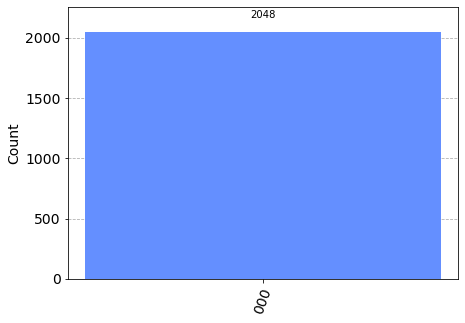

In [13]:
circuit_0=qpe_T_gate()
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(circuit_0, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

For eigenstate |1>, we get the exact value with 4 qubits, 3 counting qubits and 1 qubit to store eigenstate of the operator T.

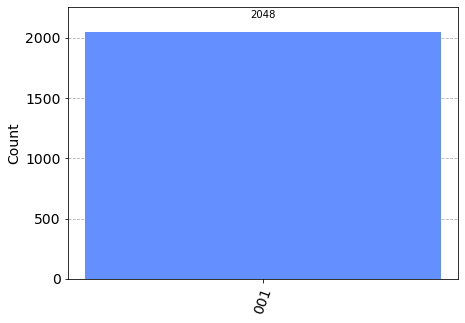

In [14]:
circuit_1=qpe_T_gate(1)
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(circuit_1, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### 2.2

In [15]:
def qft_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [16]:
def phase_estimation(qpe, eigenstate, number_qubits):
    
    #Initial setup
    for i in range(number_qubits):
        qpe.h(i)
    if eigenstate==1:
        qpe.x(number_qubits)
        
    #CU rotations
    repetitions = 1
    for counting_qubit in range(number_qubits):
        for i in range(repetitions):
            qpe.cp(np.pi/4, counting_qubit, number_qubits)
        repetitions *= 2
        
    qft_dagger(qpe, number_qubits)
    
    #Measure counting qubits
    for n in range(number_qubits):
        qpe.measure(n,n)

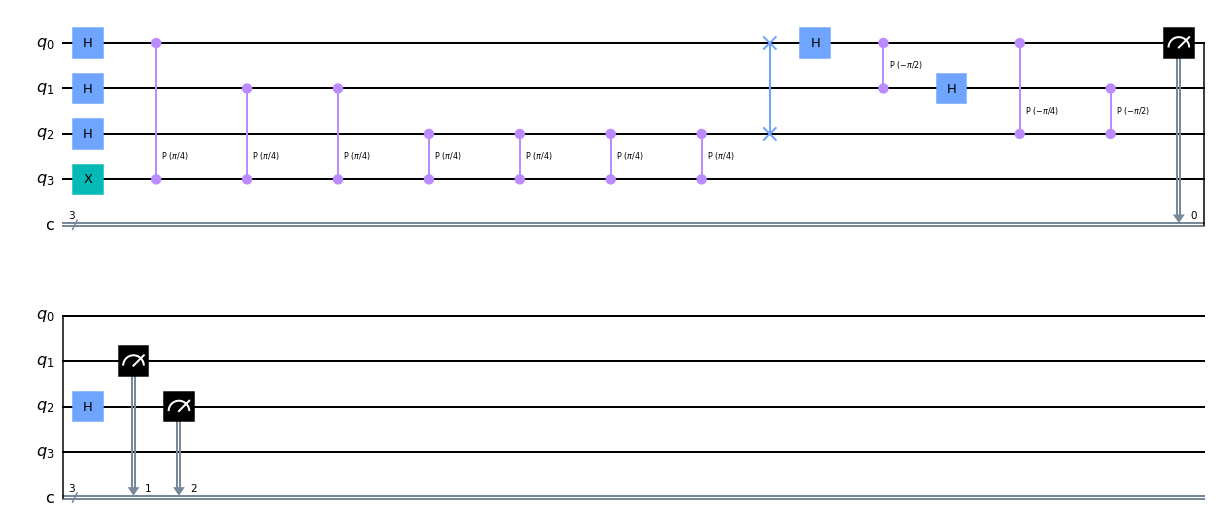

In [17]:
qc=QuantumCircuit(4,3)
phase_estimation(qc,1,3)
qc.draw('mpl')

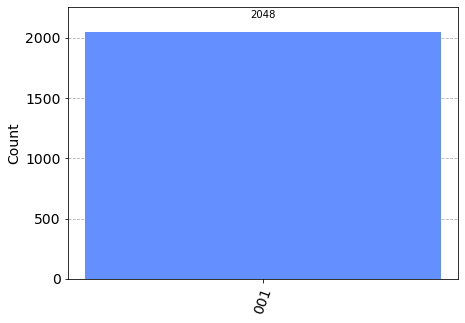

In [18]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qc, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### 2.3

In [19]:
def phase_estimation_2(qpe, eigenstate, number_qubits):
    
    #Initial setup
    for i in range(number_qubits):
        qpe.h(i)
    if eigenstate==1:
        qpe.x(number_qubits)
        
    #CU rotations
    repetitions = 1
    for counting_qubit in range(number_qubits):
        for i in range(repetitions):
            qpe.cp(2*np.pi/3, counting_qubit, number_qubits)
        repetitions *= 2
    
    qft_dagger(qpe, number_qubits)
    qpe.barrier()
    for n in range(number_qubits):
        qpe.measure(n,n)

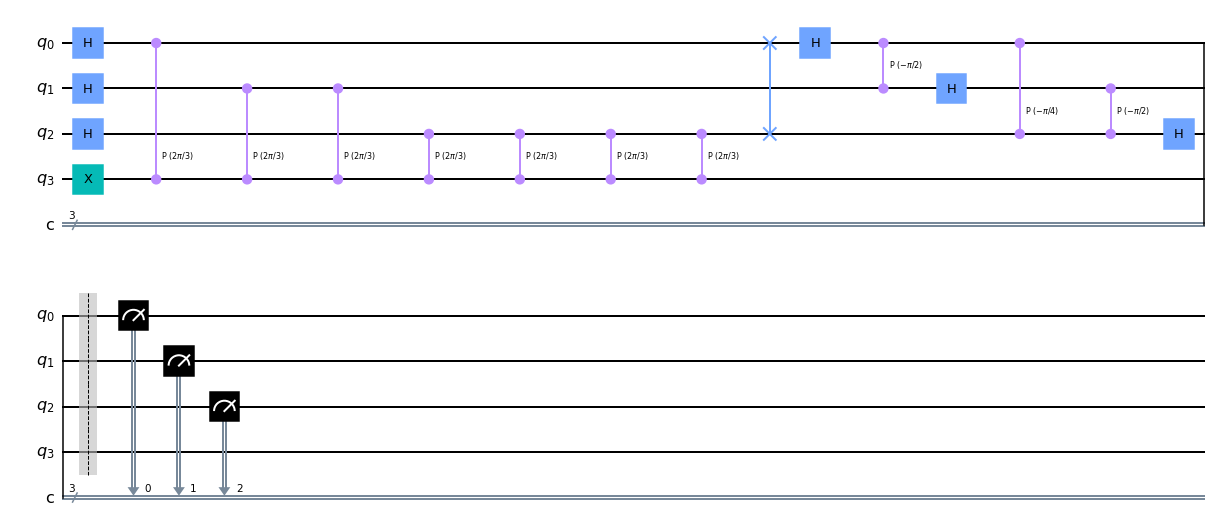

In [21]:
circuit_rz=QuantumCircuit(4,3)
phase_estimation_2(circuit_rz,1,3)
circuit_rz.draw('mpl')

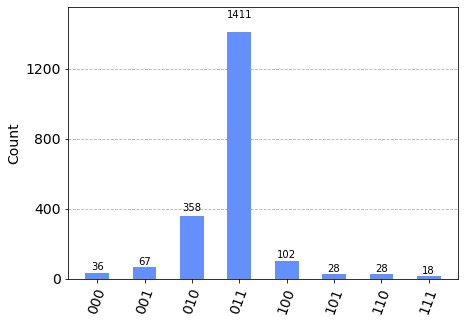

In [22]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(circuit_rz, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

It is observed that the true value of $\theta$ is not decided precisely based on the number of qubits that we gave, so we need to build a circuit that gives the value of theta with precision.

### 2.4

To plot the highest probability against the number of qubits employed, I have used a circuit with 2,3,5,7,9,11 qubits. It can be observed that as we increase the number of counting qubits, the value of $\theta$ keeps getting more precise.

The value of theta for circuit with  2  qubits is  0.25
The value of theta for circuit with  3  qubits is  0.375
The value of theta for circuit with  5  qubits is  0.34375
The value of theta for circuit with  7  qubits is  0.3359375
The value of theta for circuit with  9  qubits is  0.333984375
The value of theta for circuit with  11  qubits is  0.33349609375


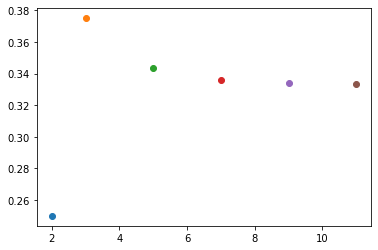

In [24]:
list_num_qubits=[2,3,5,7,9,11]

for i in range(len(list_num_qubits)):
    circuit_rz=QuantumCircuit(list_num_qubits[i]+1,list_num_qubits[i])
    phase_estimation_2(circuit_rz,1,list_num_qubits[i])
    t_qpe = transpile(circuit_rz, aer_sim)
    qobj = assemble(t_qpe, shots=shots)
    results = aer_sim.run(qobj).result().get_counts()
    
    max_count = 0
    max_state = ''
    for state, count in results.items():
        if count > max_count:
            max_count = count
            max_state = state
    theta=(int(max_state,2))/(2**list_num_qubits[i])
    print('The value of theta for circuit with ',list_num_qubits[i],' qubits is ',theta)
    plt.scatter(list_num_qubits[i],theta)

## 3.2.b Analytical treatment of the error (4 pts.)
After the controlled application of the oracle, but before the final QFT, the state of the first $m$-qubit register is:
$$\ket{\theta} = \frac{1}{2^m} \sum_{k=0}^{2^m-1} e^{2\pi i k \theta} \ket{k}$$
where $\theta$ is the parameter to be estimated. 

<ol>
    <li>Apply the QFT to $\ket{\theta}$, and give an analytical expression for the output state.</li>
    <li>Determine the probability to obtain an outcome $j \in \{0,\ldots,2^m-1\}$ when performing the measurement.</li>
    <li>Show that, if there exists a $j=\tilde{j}$ such that $\theta=\frac{\tilde{j}}{2^m}$ (i.e., $\theta$ has an exact representation in $m$ bits), then the outcome of the measurement is $j$ with unit probability.</li>
    <li>If this is not the case, let $j^*$ be the specific value of $j$ which gives the best estimate $\frac{j^*}{2^m}$ of $\theta$. In other words, it should be true that $\theta = \frac{j}{2^m} +\varepsilon$, where $|\varepsilon| < 2^{-(m+1)}$. Prove that the probability of getting the outcome $j^*$ for the measurement is larger than $\frac{4}{\pi^2}$. </li>
</ol>

<b>Hint.</b> The following inequalities are given:
$$\frac{2\pi |\varepsilon| 2^m}{|e^{2\pi i \varepsilon 2^m}-1|}\leq \frac{\pi}{2}$$ <br>
$$|e^{2\pi i \varepsilon} - 1| \leq 2\pi |\varepsilon|$$

### 3.2.b-1
As the state is not normalised, first applying normalization we get


\begin{equation*}
\ket{\theta } =\frac{1}{\sqrt{2}}\sum _{k=0}^{2^{m} -1} e^{2\pi ik\theta }\ket{k}
\end{equation*}
Applying QFT-dagger in the following way
\begin{equation*}
\sum _{j=0}^{N-1} x_{j}\ket{j} \ \xrightarrow{QFT^{\dagger }}\frac{1}{\sqrt{N}}\sum _{k=0}^{N-1}\sum _{j=0}^{N-1} x_{j} e^{-2\pi ijk/N}\ket{k}
\end{equation*}
we get our transformed as
\begin{gather*}
\ket{\theta } =\sum _{k=0}^{2^{m} -1}\sum _{j=0}^{2^{m} -1}\frac{e^{2\pi ik\theta }}{2^{m}} \ e^{-2\pi ijk/2^{m}}\ket{k}\\
\ket{\theta } =\frac{1}{2^{m}}\sum _{k=0}^{2^{m} -1}\sum _{j=0}^{2^{m} -1} e^{2\pi ik\left( \theta -j/2^{m}\right)}\ket{k}
\end{gather*}

### 3.2.b-2

For an outcome $\displaystyle j\ \epsilon \ \left\{0,1,...,2^{m} -1\right\}$, the probability can be determined as
\begin{equation*}
prob=|\frac{1}{2^{m}}\sum _{k=0}^{2^{m} -1}\left( e^{2\pi ik\left( \theta -j/2^{m}\right)}\right)^{k} |^{2}
\end{equation*}
As this is a geometric progression, we can express this as
\begin{gather*}
prob=|\frac{\left( 1-e^{2\pi ik\left( \theta -j/2^{m}\right)}\right){^{2}}^{m}}{2^{m} \ \left( 1-\left( e^{2\pi ik\left( \theta -j/2^{m}\right)}\right)\right)} |^{2}\\
prob=|\frac{\left( 1-e^{2\pi ik\left( \theta -j/2^{m}\right)}\right)}{2^{m} \ \left( 1-e^{2\pi ik\left( \theta -j/2^{m}\right)}\right)} |^{2}
\end{gather*}

### 3.2.b-3

As for $\displaystyle \theta =\tilde{j} /2^{m}$, the probability value aproaches inifinity (0/0), taking the rule of limits to numerator and denominator as
\begin{gather*}
\lim _{x\rightarrow 0}\frac{1-e^{ax}}{x} =\lim _{\theta \rightarrow \tilde{j} /2^{m}}\frac{\left( 1-e^{2\pi i2^{m}\left( \theta -\tilde{j} /2^{m}\right)}\right) /\left( \theta -\tilde{j} /2^{m}\right)}{2^{m}\left(\left( 1-e^{2\pi i\left( \theta -\tilde{j} /2^{m}\right)}\right) /\left( \theta -\tilde{j} /2^{m}\right)\right)} ...\left\{using\ x=\theta -\tilde{j} /2^{m}\right\}\\
=\frac{-2\pi i2^{m}}{2^{m}( -2\pi i)} ...\left\{Applying\ \lim _{x\rightarrow 0}\frac{1-e^{ax}}{x} =-a\right\}\\
=1\\
\end{gather*}
This proves that for $\displaystyle \theta =\tilde{j} /2^{m}$ and $\displaystyle j=\tilde{j}$, the measurement outcome is j with unit probability.

### 3.2.b-4

For $\displaystyle \theta =\tilde{j} /2^{m} +\epsilon $, the amplitude becomes
\begin{equation*}
prob=|\frac{\left( 1-e^{2\pi ik\epsilon }\right)}{2^{m} \ \left( 1-e^{2\pi i\epsilon }\right)} |^{2}
\end{equation*}
It is given that
\begin{gather*}
|e^{2\pi i\epsilon } -1|\leqslant 2\pi |\epsilon |\\
|e^{2\pi i\epsilon 2^{m}} -1|\geqslant 4|\epsilon |2^{m}
\end{gather*}
changing the sign of modulus, we end up getting
\begin{gather*}
|1-e^{2\pi i\epsilon } |\leqslant 2\pi |\epsilon |\\
|1-e^{2\pi i\epsilon 2^{m}} |\geqslant 4|\epsilon |2^{m}\\
\\
prob=|\frac{\left( 1-e^{2\pi ik\epsilon }\right)}{2^{m} \ \left( 1-e^{2\pi i\epsilon }\right)} |^{2}\\
prob=\frac{|1-e^{2\pi ik\epsilon } |^{2}}{2^{2m} \ |1-e^{2\pi i\epsilon } |^{2}}\\
\Longrightarrow prob\geqslant |\frac{4|\epsilon |2^{m}}{2^{m} 2\pi |\epsilon |} |^{2}\\
\Longrightarrow prob\geqslant \frac{4}{\pi ^{2}}
\end{gather*}
Therefore, the probability of getting outcome $\displaystyle j^{*}$ is larger than $\displaystyle 4/\pi ^{2}$

# 3.3 - Period finding (8 pts. total)
Consider a function $f:\mathbb{Z}_N\to C$, where $C$ is a finite set of values. Suppose that $f$ is known to be periodic; namely:
$$\exists s \in Z_N - \{0\} \mbox{ s.t. } f(x+s)=f(x)\,\,\,\, \forall x \in Z_N$$
Furthermore, in each period, each symbol appears only once.
The goal of this problem is to obtain $s$. For the sake of simplicity, assume $N = 2^n$ for some $n$.

## 3.3.a Classical version (2 pt.)
<ol>
  <li>Show that the periodicity condition implies that $s$ divides $N$. </li>
  <li>Show that the problem can be solved on a classical calculator with $\mathcal{O}(n)$ evaluations of the function $f$, where $n = \log_2 N$.  </li>
</ol>

### 3.3.a-1

To prove that the 𝑠 divides 𝑁, I have considered the two values 𝑓(0) and 𝑓(𝑠). Since 𝑓 is periodic with period 𝑠 , we have:

𝑓(0) = 𝑓(𝑠)
𝑓(0 + 𝑠) = 𝑓(𝑠 + 𝑠) = 𝑓(𝑠)

Continuing in this way, it is observed that 𝑓(0), 𝑓(𝑠), 𝑓(2𝑠), 𝑓(3𝑠), ... all have the same value. 


Since 𝑓 takes on only a finite number of values, there must exist two different indices 𝑖 and 𝑗 such that 0 ≤ 𝑖 < 𝑗 < 𝑠 and 𝑓(𝑖) = 𝑓(𝑗) . But this contradicts the assumption that each symbol appears only once in each period. Therefore, there is no such pair 𝑖 , 𝑗 such that 𝑓(𝑖) = 𝑓(𝑗) for 0 ≤ 𝑖 < 𝑗 < 𝑠 . In other words, the function 𝑓 has no shorter period than 𝑠.

Now suppose that 𝑠 does not divide 𝑁 . Then we can write 𝑁 = 𝑠𝑘 + 𝑟 for some integers 𝑘 and 𝑟 with 0 < 𝑟 < 𝑠 . Then for any integer 𝑥 , we have:

𝑓(𝑥) = 𝑓(𝑥 + 𝑁) = 𝑓(𝑥 + 𝑠𝑘 + 𝑟) = 𝑓(𝑥 + 𝑟)

This means that the period of 𝑓 is not 𝑠 , but rather 𝑟 such that 𝑟 < 𝑠 , which contradicts our earlier conclusion that 𝑠 is the shortest period of 𝑓.

Therefore, we must have 𝑠 dividing 𝑁.

### 3.3.a-2
To prove that the problem can be solved with O($log_2 N$), I have considered the following algorithm-

Initialize an empty dictionary to store the values of 𝑓.
Choose a random element 𝑟 from $\mathbb{Z}_N$.
Compute the values of 𝑓(𝑟), 𝑓(𝑟+1), 𝑓(𝑟+2), …, 𝑓(𝑟+𝑛−1) and store them in the dictionary.
For each integer 𝑖 from 1 to 𝑛, do the following:

a. Choose a random element 𝑟 from $\mathbb{Z}_N$.

b. Compute 𝑓(𝑟), $𝑓(𝑟+2^1)$, $𝑓(𝑟+2^2)$, …, $𝑓(𝑟+2^{𝑖−1})$ and store them in the dictionary.

c. For each key 𝑘 in the dictionary, check if $𝑓(𝑟+𝑘+2^{𝑖−1})$ is equal to 𝑓(𝑟+𝑘). If it is, then set $𝑆=𝑘+2^{𝑖−1}$ and output 𝑆. If no such 𝑆 is found after checking all keys, then repeat step 4 with the next integer 𝑖.

The idea behind this algorithm is that we first compute the values of 𝑓 on a random sequence of 𝑛 consecutive integers, and then we use these values to efficiently compute 𝑓 on larger intervals of length $2^{𝑖}$ by taking advantage of the periodicity of the function. Specifically, if 𝑓 is periodic with period 𝑠, then 𝑓(𝑥+𝑠)=𝑓(𝑥) for all 𝑥 in $\mathbb{Z}_N$. Therefore, if we know the values of 𝑓(𝑥), 𝑓(𝑥+𝑠), and 𝑓(𝑥+2𝑠) for some 𝑥, then we can compute 𝑓(𝑥+2𝑠) without evaluating 𝑓 on any new values. This allows us to iteratively double the length of the intervals on which we compute 𝑓 until we find the period 𝑠.

The expected number of evaluations of 𝑓 in this algorithm is O($log_2 N$), since at each iteration of step 4 we compute 𝑓 on $2^{𝑖-1}$ new values, and we repeat this process at most 𝑛 times. The worst case scenario however, occurs when the period 𝑠 is equal to 𝑁/2, in which case we need to evaluate 𝑓 on all $2^{𝑛-1}$ possible values in order to find 𝑠.

## 3.3.b Quantum protocol (3 pts.)
Consider an oracle $O_f$, acting as follows:
$$O_f(\ket{x}\ket{b}) = \ket{x}\ket{b\oplus f(x)}$$
where $b$ is a string of length $m$, and $\oplus$ represents the sum modulus $2^m$. Consider the following protocol:
<ul>
  <li>Prepare the state 
    $$\frac{1}{\sqrt{N}} \sum_{x\in Z_N} \ket{x}$$
    These first qubits constitute the <b>first register</b>.
  </li>
  <li> Attach a <b>second register</b> in state $\ket{0^m}$.</li>
  <li> Query the oracle $O_f$ on the current input.</li>
  <li> Measure the second register in the computational basis.</li>
  <li> Apply the QFT to the first register.</li> 
  <li> Measure the first register. </li>
</ul>

<ol>
  <li>Let $c \in C$ be fixed. Show that the probability of obtaining $c$ as measurement outcome on the second register is $\frac{1}{s}$.</li>
  <li>Write the state of the first register after having obtained measuremetn outcome $c$ on the second register.</li>
</ol>

<b>Hint.</b> You may find it use useful to define the auxiliary function 
$$f_c(x) = \begin{cases}1 & \mbox{ if } f(x)=c \\ 0 & \mbox { otherwise}\end{cases}$$

### 3.3.b-1

The protocol starts by preparing the state $\displaystyle \frac{1}{\sqrt{N}}\sum \ket{x}$,the uniform superposition of all the kets $\displaystyle \ket{x}$.

Then attaching the state $\displaystyle \ket{0^{m}}$, we get 
\begin{equation*}
\frac{1}{\sqrt{N}}\sum \ket{x} \otimes \ket{0^{m}} =\frac{1}{\sqrt{N}}\sum \ket{x}\ket{0^{m}}
\end{equation*}
After querying the oracle, we get
\begin{equation*}
\frac{1}{\sqrt{N}}\sum \ket{x}\ket{f( x)}
\end{equation*}
Using the auxilliary given in the question, the above state can be rewritten as 
\begin{equation*}
\sum _{c}\frac{1}{\sqrt{N}}\sum _{x\epsilon Z_{N}}\left( f_{c}( x)\ket{x}\right) \otimes \ket{f( x)}
\end{equation*}
When $\displaystyle f_{c}( x) =0$, the term $\displaystyle \ket{x}\ket{f( x)}$ disappears from the sum so we only count these terms for f(x)=c. Also, it can be observed that the number of non-zero terms of the form $\displaystyle f_{c}( x)\ket{x}$ is N/s.

Thus, the probability of this state is then
\begin{gather*}
\sum _{x\epsilon Z_{N}}\left(\frac{1}{\sqrt{N}} f_{c}( x)\right)^{2} =\frac{1}{N}\sum _{x\epsilon Z_{N}}( f_{c}( x))^{2} =\frac{1}{N}\sum _{x\epsilon Z_{N}} f_{c}( x)\\
=E[ f_{c}( x)] =Pr[ f( x) =c]\\
=fraction\ of\ outputs\ which\ are\ c\\
=1/s
\end{gather*}

So, the probability of obtaining c measurement is 1/s

### 3.3.b-2

The state of first register after obtaining measurement on second register and after applying normalization is


\begin{equation*}
\sqrt{\frac{s}{N}}\left(\sum _{x\epsilon Z_{N}} f_{c}( x)\ket{x}\right) \otimes \ket{c}
\end{equation*}
This state can be rewritten as
\begin{equation*}
\frac{1}{\sqrt{N}}\sum _{x\epsilon Z_{N}}\sqrt{s} f_{c}( x)\ket{x}
\end{equation*}

## 3.3.c The Fourier coefficients /1 (1 pt.)
Consider a function $g: \mathbb{Z}_N \to C$ and a number $t \in \mathbb{Z}_N$. Let $k: \mathbb{Z}_N \to C$ be another function such that $k(x) = g(x+t)$. Show that $g$ and $k$ have the same Fourier coefficients, except for a multiplicative factor of absolute value 1.

Notice that it follows that the measurement outcome on the first register does not depend on the $c$ we measured on the second register. Without loss of generality, we can hence assume to have measured $f(0)=c$. Therefore:
$$f_c(x)=\begin{cases}1 & \mbox{ if } x=0,s,2s,\ldots \\ 0 & \mbox{ otherwise}\end{cases}$$

### Solution
For this proble, I have denoted the Fourier coefficients of $g$ and $k$ by $\hat{g}(s)$ and $\hat{k}(s)$ respectively. We want to show that $\hat{g}(s) = \epsilon_s \hat{k}(s)$, where $\epsilon_s$ is a complex number with absolute value 1.

By definition, we have:

$$\hat{g}(s) = \frac{1}{\sqrt{N}}\sum_{x\in\mathbb{Z}_N}g(x)\omega_N^{-sx}$$

and

$$\hat{k}(s) = \frac{1}{\sqrt{N}}\sum_{x\in\mathbb{Z}_N}k(x)\omega_N^{-sx}$$

where $\omega_N = e^{2\pi i/N}$.

Let us express $k(x)$ in terms of $g(x)$ and $t$:

$$k(x) = g(x+t)$$

Substituting this expression into the Fourier coefficient of $k$, we obtain:

\begin{align*}
\hat{k}(s) &= \frac{1}{\sqrt{N}}\sum_{x\in\mathbb{Z}N}k(x)\omega_N^{-sx} \
&= \frac{1}{\sqrt{N}}\sum_{x\in\mathbb{Z}N}g(x+t)\omega_N^{-sx} \
\end{align*}
Adding the change$y = x-t$
\begin{align*}
&= \frac{1}{\sqrt{N}}\sum_{y\in\mathbb{Z}N}g(y)\omega_N^{-s(y-t)} \
&= \omega_N^{st}\frac{1}{\sqrt{N}}\sum_{y\in\mathbb{Z}_N}g(y)\omega_N^{-sy} \
&= \omega_N^{st}\hat{g}(s)
\end{align*}


Therefore, we have $\hat{g}(s) = \epsilon_s \hat{k}(s)$, where $\epsilon_s = \omega_N^{st}$ is a complex number with absolute value 1.

## 3.3.d The Fourier coefficients /2 (1 pt.)
Prove that $f_c(x)$ defined in this way has Fourier coefficients given by:
$$\hat{f_c}(\gamma) = \begin{cases}\frac{1}{s} & \mbox{ if } \gamma \in \{0, N/s, 2N/s,\ldots\} \\ 0 & \mbox{ otherwise}\end{cases}$$

It follows that, when performing the measurement on the first register, we are sampling uniformly a value of $\gamma$ from the set $\{0, N/s, 2N/s, \ldots \}$, or equivalently from the $\gamma$ values such that $\gamma s =0 \mod N$.

### Solution

To show that the Fourier coefficients of $𝑓_𝑐(𝑥)$ are given by $𝑓_𝑐(𝛾)=1/𝑠$ if 𝛾∈{0,𝑁/𝑠,2𝑁/𝑠,…} and $𝑓_𝑐(𝛾)=0$ otherwise, we can express $𝑓_𝑐(𝑥)$ as a linear combination of the Fourier basis functions:

$𝑓_𝑐(𝑥) = (1/𝑠) * [𝑓_𝑐(0) + 𝑓_𝑐(𝑁/𝑠)e^{2𝜋𝑖(𝑥/𝑁)(𝑁/𝑠)} + 𝑓_𝑐(2𝑁/𝑠)e^{2𝜋𝑖(𝑥/𝑁)(2𝑁/𝑠)} + ...]$

where the sum goes over all multiples of 𝑁/𝑠, and the Fourier coefficients $𝑓_𝑐(𝛾)$ are the coefficients of this linear combination.

We know that $𝑓_𝑐(0) = 1$ and $𝑓_𝑐(𝑥) = 0$ for all 𝑥 ≠ 0 mod 𝑠, so the sum simplifies to:

$𝑓_𝑐(𝑥) = (1/𝑠) * [1 + e^{2𝜋𝑖(𝑥/𝑁)(𝑁/𝑠)} + e^{2𝜋𝑖(𝑥/𝑁)(2𝑁/𝑠)} + ...]$

Now, we can use the formula for the sum of a geometric series to simplify this expression:

$𝑓_𝑐(𝑥) = (1/𝑠) * [1 / (1 - e^{2𝜋𝑖(𝑥/𝑁)(𝑁/𝑠))}]$

If 𝑥/𝑁 is a multiple of 𝑠, then the denominator is 0, and we have $𝑓_𝑐(𝑥) = 1/𝑠$. Otherwise, the denominator is a complex number of absolute value less than 1, so the expression in brackets is a complex number of absolute value less than 1/𝑠, and the whole expression is 0. Therefore, we have shown that $𝑓_𝑐(𝛾)=1/𝑠$ if 𝛾∈{0,𝑁/𝑠,2𝑁/𝑠,…} and $𝑓_𝑐(𝛾)=0$ otherwise.


## 3.3.e Finding the period (1 pt.)
Describe how the measurement outcomes obtained from the measurement on the first register can be used to find the period of the function $f$.

### Solution

After obtaining a measurement outcome 𝛾∈{0,𝑁/𝑠,2𝑁/𝑠,…}, we can use the fact that 𝑠 is the period of 𝑓 to infer that 𝑠𝑘 is also a period of 𝑓 for any integer 𝑘. Therefore, we can write:

𝑓(𝑥)=𝑓(𝑥+𝑠)=𝑓(𝑥+2𝑠)=⋯=𝑓(𝑥+𝑘𝑠)

This implies that:

$𝑘𝑠=𝑥_0+𝑟$

where 𝑟 is the remainder when $𝑥_0$ is divided by 𝑠. Since 𝑠 is not known, we need to repeat the measurement multiple times to obtain several measurement outcomes $𝛾_1,𝛾_2,…,𝛾_𝑚$. Then, we can compute the continued fraction expansion of the ratios $𝛾_𝑖/𝑁$ . With high probability, this continued fraction expansion will have a denominator that is a divisor of 𝑁 . By choosing the largest denominator that is smaller than 𝑁 , we can obtain an estimate of the period 𝑠.

# 3.4 - Factoring (6 pts. total)
The aim of this exercise is to build a specific implementation of Shor's factoring algorithm, which will allow factorisation of the number $15$. 

## 3.4.a Classical auxiliary functions  (1 pt.)
First of all, some classical subroutines are required. Write the following Python functions:
<ol>
    <li> <code>gcd(x,y)</code>, which computes the greatest common divisor between the numbers <code>x</code> and <code>y</code>. </li>
    <li> <code>verify_factor(N,x)</code>, which verifies whether <code>x</code> is a factor of <code>N</code>. 
</ol>
Discuss the scaling of the computational complexity of the latter function in terms of the number of bits required to encode $N$ and in reference to the complexity class *NP*.

### Solution
### 3.4.a

In [25]:
def gcd(x, y):
    # Check whether x is greater than or equal to y
    if x < y:
        x, y = y, x
    
    # Use the Euclidean algorithm to compute the GCD
    while y != 0:
        x, y = y, x % y
    
    return x

In [26]:
def verify_factor(N,x):
    if N%x==0:
            return true
    return false

### Comment
The computational complexity of the verify_factor function is O(log N), where N is the number being checked and log N represents the number of bits required to encode N in binary. This is because the function performs a single division operation (modulo operator) to check whether N is divisible by x. The number of bits required to represent N in binary is proportional to log N, so the time complexity of this operation is O(log N).

In terms of complexity classes, the verify_factor function belongs to the class P, which represents problems that can be solved in polynomial time. This is because the time complexity of the function is bounded by a polynomial in the input size, which is log N in this case. The complexity class NP represents problems that can be verified in polynomial time. The verified_factor function does not belong to NP because it is a problem that can be solved in polynomial time, not just verified in polynomial time.

## 3.4.b Classical period finding (1 pt.)
Consider the function
$$f(x) = a^x \mod N$$
where $a$, $x$ and $N$ are numbers in $\mathbb{N}$, and $a$ is prime. It can be shown that the function $f(x)$ is periodic, and that each value of $f(x)$ appears only once in each period.

Define a Python function <code>classical_period_find(a,N)</code> that computes the period of the function $f(x)$ of the form specified above, for given $a$ and $N$. Discuss the complexity of the function, in terms of the bits required to encode $N$.

Next, define a Python function <code>period_verify(a,N,p)</code>, which verifies whether the proposed $p$ is the correct period of $f(x)$. Discuss its complexity in terms of the bits required for encoding $N$. Discuss the relation between <code>classical_period_find</code> and <code>period_verify</code> in reference to the complexity class *NP*.

In [27]:
def classical_period_find(a, N):

    # Initialize variables
    x = 0
    y = 0
    i = 1
    
    # Find the first match
    while i <= N + 1:
        x = (a * x) % N
        y = (a * y) % N
        y = (a * y) % N
        
        if x == y:
            break
        
        i += 1
    
    # Find the period
    period = 0
    
    while i <= N + 1:
        x = (a * x) % N
        
        if x == y:
            period = i
            break
        
        i += 1
    
    return period

### Comment
The complexity of the classical_period_find(a,N) function is dominated by the loop that searches for the period using the Floyd's cycle-finding algorithm. The algorithm has a time complexity of $O(N^2)$, where N is the length of the function's cycle. In the worst case, N can be as large as N-1, if the function's period is equal to N-1.

In terms of the bits required to encode N, the time complexity of the function can be expressed as $O(2^{log N^2})$, since the number of bits required to encode N in binary is proportional to log N. Therefore, the time complexity of the function is O(N) = $O(2^{log N^2}$), which means that it grows exponentially with the number of bits required to encode N.

However, in practice, the function's time complexity is typically much lower than the worst-case scenario. This is because the length of the function's cycle is often much shorter than N-1. Moreover, the Floyd's cycle-finding algorithm is an proven to be efficient algorithm for detecting cycles in periodic functions, and its time complexity is typically much lower than $O(2^{log N^2})$.

In [28]:
def period_verify(a, N, p):

    # Initialize variables
    x = 1
    i = 1
    
    # Verify the period
    while i <= p:
        x = (a * x) % N
        
        if x == 1 and i != p:
            return False
        
        i += 1
    
    return True

### Comment
The time complexity of the period_verify(a,N,p) function is dominated by the loop that iterates through the function f(x) for p steps. Since each iteration of the loop requires one modular multiplication, the time complexity of the function is O(p) = O(N), where N is the upper bound on the length of the function's period.

In terms of the bits required to encode N, the time complexity of the function can be expressed as O(log N), since the number of bits required to encode N in binary is proportional to log N.

However, since the function assumes that p is a valid period of the function, the actual time complexity of the function may be much lower in practice. If p is not a valid period of the function, the function will return False after p iterations, which may be much less than the upper bound on the length of the function's period.

Therefore, the actual time complexity of the function depends on the value of p, and may be much lower than the worst-case time complexity.

### Relation between the two functions

The classical_period_find and period_verify functions are both algorithms for computing the period of the function $f(x) = a^x mod N$, where a and N are positive integers.

The classical_period_find function uses the classical algorithm based on the quantum Fourier transform to find the period of the function. The algorithm has a time complexity of $O(N^2)$, where N is the upper bound on the length of the function's period. In terms of the bits required to encode N, the time complexity of the function can be expressed as $O(2^{log N^2}) = O(N^2)$, which means that it grows exponentially with the number of bits required to encode N.

On the other hand, the period_verify function verifies whether a proposed period of the function is valid or not. The function has a time complexity of O(N), where N is the upper bound on the length of the function's period. In terms of the bits required to encode N, the time complexity of the function can be expressed as O(log N), which means that it grows linearly with the number of bits required to encode N.

In terms of the complexity class NP, the classical_period_find function belongs to the class NP, since it is a decision problem that can be solved in polynomial time by a non-deterministic Turing machine. On the other hand, the period_verify function is a verification algorithm that can be used to verify the correctness of a proposed solution to the classical_period_find problem in polynomial time. Therefore, the period_verify function also belongs to the class NP.

In summary, the classical_period_find and period_verify functions are both algorithms for computing the period of a periodic function, and they both belong to the complexity class NP. However, the classical_period_find function has a higher time complexity than the period_verify function, and may not be efficient for large values of N.

## 3.4.c Quantum period finding (2pt.)
For the specific case of $a=2$, $N=15$, write the Qiskit code for quantum period finding (Shor's algorithm). 

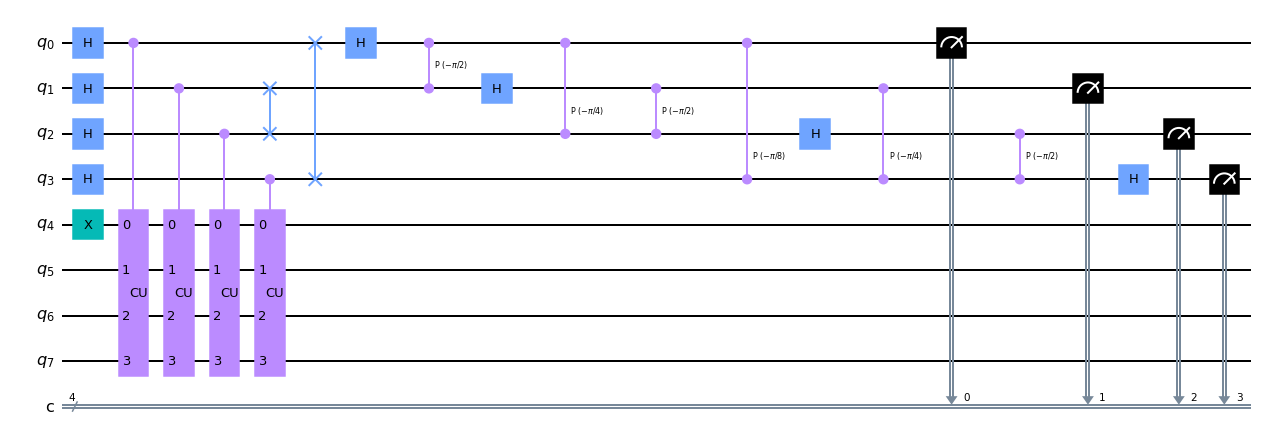

In [31]:
def control_U_for_period_finding_15(a, power):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4,name='CU')        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)

    return U.to_gate().control()

num = 4  # number of counting qubits
a = 2
N=15

qpf = QuantumCircuit(num + 4, num)

# Initialize counting qubits in state |+>
for q in range(num):
    qpf.h(q)
    
# And auxiliary register in state |1>
qpf.x(num)

# Apply controlled-U operations
for q in range(num):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    qpf.append(control_U_for_period_finding_15(a, 2**q), 
             [q] + [i+num for i in range(4)])

# Do inverse-QFT
qft_dagger(qpf,num)

# Measure circuit
qpf.measure(range(num), range(num))
qpf.draw('mpl',fold=-1)

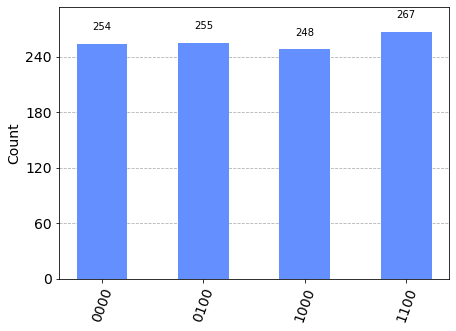

In [32]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qpf, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Pass the most frequent outcomes to the following function, which estimates the compatible periods using a variant of the continuous-fractions algorithm. You can verify which one of the candidates is the correct period using the <code>period_verify</code> function.

In [33]:
def estimate_period(shor_result):
    res_range = 16
    
    if shor_result < res_range/2:
        shor_result = res_range - shor_result
        
    best_error = 1.
    e0 = 0
    e1 = 1
    e2 = 0
    
    actual = shor_result / res_range
    candidates = []
    
    for denominator in range(1, shor_result):
        numerator = round(denominator * actual)
        estimated = numerator / denominator 
        error = abs(estimated - actual)
        
        e0 = e1
        e1 = e2
        e2 = error
        
        if e1 <= best_error and e1 < e0 and e1 < e2:
            repeat_period = denominator - 1
            candidates.append(denominator - 1)
            best_error = e1
            
        if 0 in candidates:
            candidates.remove(0)
        
    return candidates

In [34]:
# Find the most common measurement outcome
max_count = 0
max_state = ''
for state, count in counts.items():
    if count > max_count:
        max_count = count
        max_state = state

candidates=estimate_period(int(max_state,2))
print(candidates)

[4, 8]


In [35]:
for i in range(len(candidates)):
    print(period_verify(a,15,candidates[i]))

True
False


## 3.4.d Prime factoring (1 pt.)
Now, use the function <code>gcd</code> to return the factorisation of the number $15$ from Shor's algorithm. If $p$ is the period of the function $f(x)$, then one of $N$'s prime factor might be given by 
$$\gcd\left(N, a^{p/2}+1\right)$$
or by
$$\gcd\left(N, a^{p/2}-1\right)$$

In [36]:
print(gcd(N,a**(2)+1))
print(gcd(N,a**(2)-1))

5
3


## 3.4.e Order finding and period finding (1 pt.)
In this exercise, you have built Shor's factorisation algorithm in a sligthly different way than in the class, based on the <b>period finding</b> rather than on the <b>order finding</b>.

Period finding, as discussed above, aims at finding the least positive $r$ such that:
$$f(x+r) = f(x) \,\,\,\,\, \forall x$$

Order finding considers a specific function of the form:
$$ f(x) = a^x \mod N$$
and aims at finding the least $x\neq 0$ such that $f(x) = 1$. 

Show that order finding is a subclass of period finding. 

### 3.4.e
The order finding algorithm is used to find the order of a chosen base a modulo an integer N, while the period finding algorithm is used to find the period of the function $f(x) = a^x mod N$.

We can show that order finding is a subclass of period finding by demonstrating that the order of a modulo N is equal to the period of $f(x) = a^x mod N$ for a certain input value of a.

Suppose we want to find the order of a modulo N. Let r be the smallest positive integer such that $a^r mod N = 1$. Then for any positive integer k, we have $a^{r*k} mod N = 1$, since $(a^r)^k mod N = 1^k mod N = 1$.

Now consider the function $f(x) = a^x mod N$. We can rewrite f(x) as $f(x) = a^{r*q + s} mod N$, where q and s are the quotient and remainder of dividing x by r. Then we have:

$f(x + r) = a^{x + r} mod N$

$f(x + r) = a^x * a^r mod N$

$f(x + r) = a^x mod N  ( since a^r mod N = 1)$

$f(x + r) = f(x)$
         
This shows that f(x) has period r, which is equal to the order of a modulo N. Therefore, we can use period finding to find the order of a modulo N.

Therefore, order finding is a subclass of period finding, because the order of a modulo N is equal to the period of $f(x) = a^x mod N$ for a certain input value of a.